# AEMO DATA
##### Source : https://aemo.com.au/energy-systems/electricity/national-electricity-market-nem/data-nem/aggregated-data

## Install Required Libraries

In [1]:
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

packages = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'tensorflow']

for package in packages:
    try:
        __import__(package)  
    except ImportError:
        install(package)  

from IPython.display import clear_output

clear_output(wait=True)

print("All required packages are installed.")


All required packages are installed.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/Users/anup/Desktop/AEMO_DATA/Merged_PRICE_AND_DEMAND_VIC1.csv'
data = pd.read_csv(file_path)

data['SETTLEMENTDATE'] = pd.to_datetime(data['SETTLEMENTDATE'])

data.set_index('SETTLEMENTDATE', inplace=True)

data.head()

,REGION,TOTALDEMAND,RRP,PERIODTYPE
SETTLEMENTDATE,,,,
2024-01-01 00:05:00,VIC1,3977.10,51.80,TRADE
2024-01-01 00:10:00,VIC1,3982.35,64.27,TRADE
2024-01-01 00:15:00,VIC1,3965.75,52.67,TRADE
2024-01-01 00:20:00,VIC1,3932.93,48.78,TRADE
2024-01-01 00:25:00,VIC1,3904.02,49.19,TRADE


## Spot Price Trends Over Time

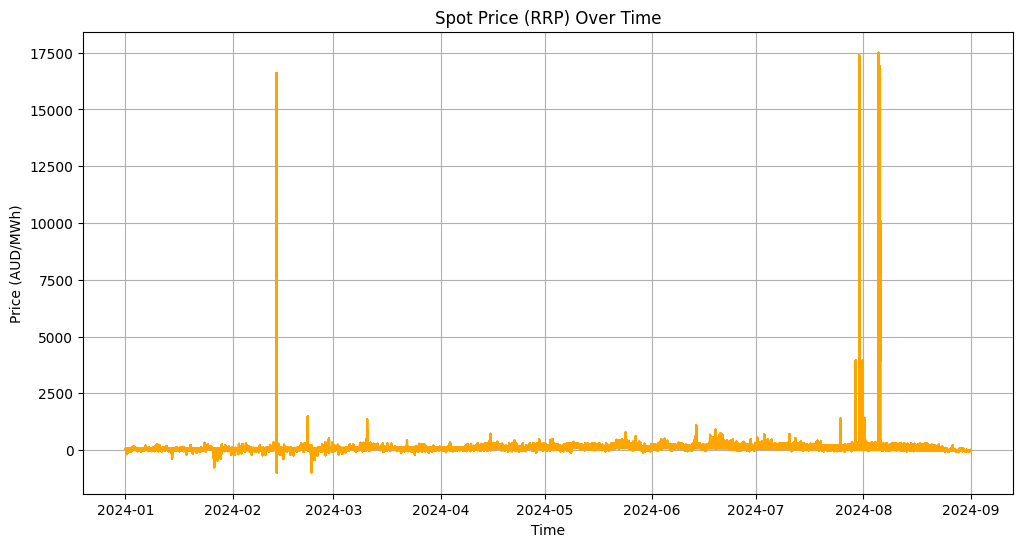

In [6]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data['RRP'], color='orange')
plt.title('Spot Price (RRP) Over Time')
plt.ylabel('Price (AUD/MWh)')
plt.xlabel('Time')
plt.grid(True)
plt.show()


## Price Volatility Analysis

#### Daily Volatility

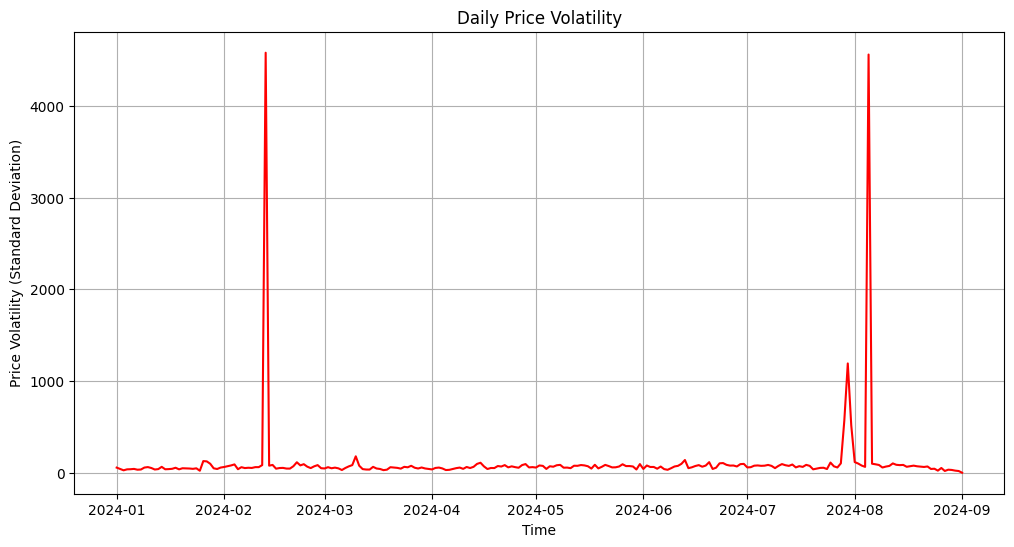

In [7]:
daily_volatility = data['RRP'].resample('D').std()


plt.figure(figsize=(12,6))
plt.plot(daily_volatility, color='red')
plt.title('Daily Price Volatility')
plt.ylabel('Price Volatility (Standard Deviation)')
plt.xlabel('Time')
plt.grid(True)
plt.show()


#### Weekly Volatility

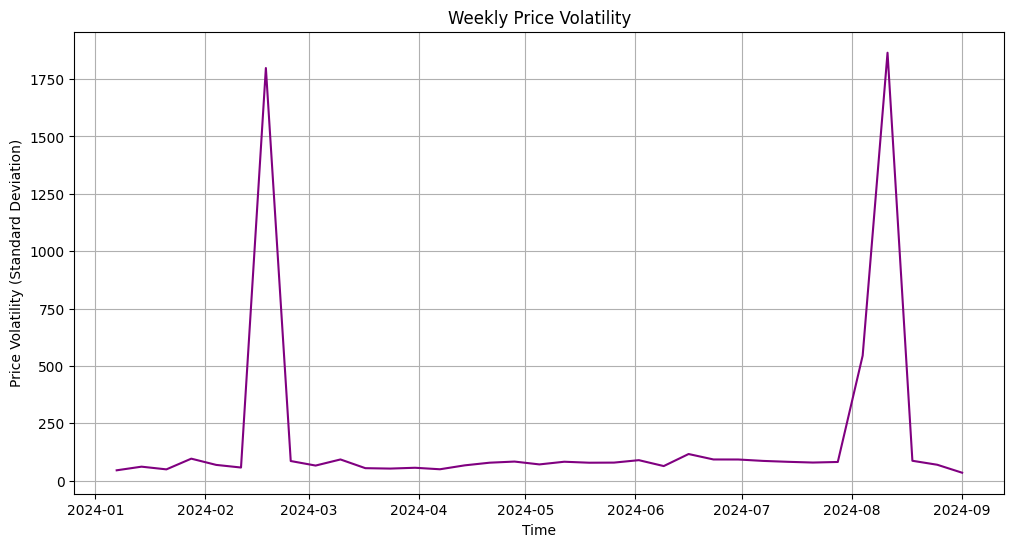

In [8]:
weekly_volatility = data['RRP'].resample('W').std()

plt.figure(figsize=(12,6))
plt.plot(weekly_volatility, color='purple')
plt.title('Weekly Price Volatility')
plt.ylabel('Price Volatility (Standard Deviation)')
plt.xlabel('Time')
plt.grid(True)
plt.show()


## Price vs Demand Relationship

#### Correlation between Price and Demand

Correlation between Total Demand and Price (RRP): 0.21


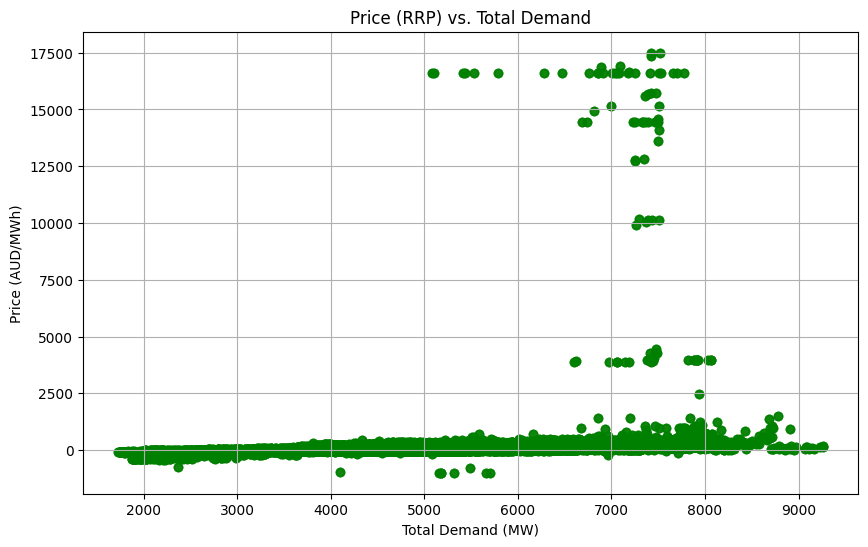

In [9]:
correlation = data[['TOTALDEMAND', 'RRP']].corr().iloc[0, 1]
print(f"Correlation between Total Demand and Price (RRP): {correlation:.2f}")

plt.figure(figsize=(10,6))
plt.scatter(data['TOTALDEMAND'], data['RRP'], alpha=0.5, color='green')
plt.title('Price (RRP) vs. Total Demand')
plt.xlabel('Total Demand (MW)')
plt.ylabel('Price (AUD/MWh)')
plt.grid(True)
plt.show()


#### Moving Averages to See Trends

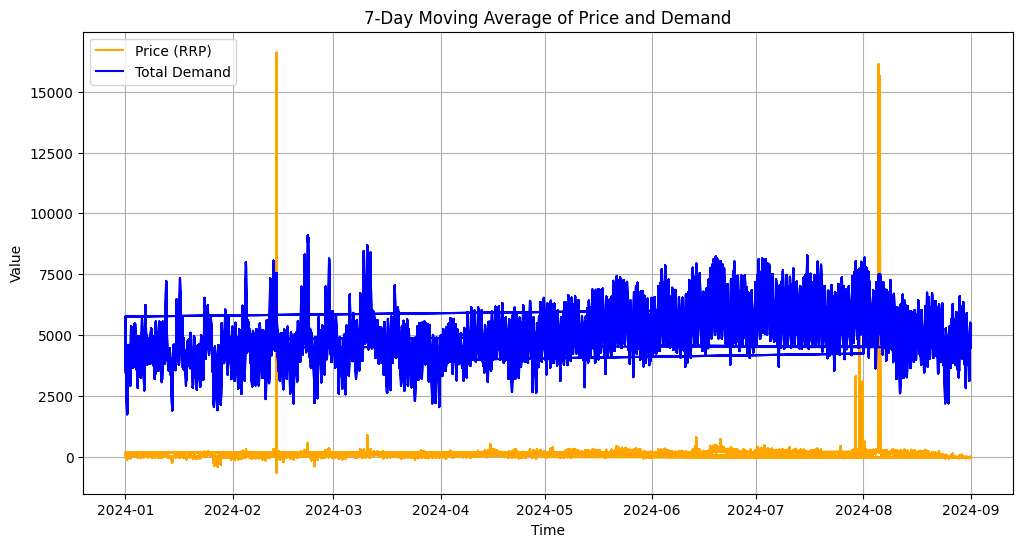

In [10]:
data['Price_MA'] = data['RRP'].rolling(window=7).mean()
data['Demand_MA'] = data['TOTALDEMAND'].rolling(window=7).mean()

plt.figure(figsize=(12,6))
plt.plot(data.index, data['Price_MA'], label='Price (RRP)', color='orange')
plt.plot(data.index, data['Demand_MA'], label='Total Demand', color='blue')
plt.title('7-Day Moving Average of Price and Demand')
plt.ylabel('Value')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.show()


## Price Spikes and Events

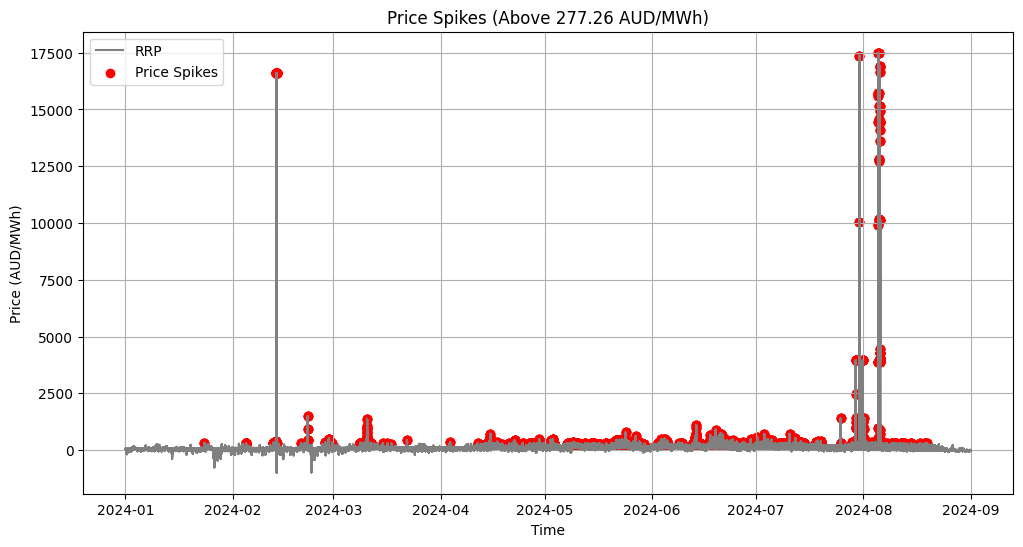

,RRP
SETTLEMENTDATE,
2024-01-23 18:50:00,316.63
2024-02-04 18:00:00,295.38
2024-02-04 18:25:00,299.50
2024-02-04 18:30:00,299.50
2024-02-04 18:35:00,299.50


In [11]:
price_threshold = data['RRP'].quantile(0.95) 

price_spikes = data[data['RRP'] > price_threshold]

plt.figure(figsize=(12,6))
plt.plot(data.index, data['RRP'], label='RRP', color='gray')
plt.scatter(price_spikes.index, price_spikes['RRP'], color='red', label='Price Spikes')
plt.title(f'Price Spikes (Above {price_threshold:.2f} AUD/MWh)')
plt.ylabel('Price (AUD/MWh)')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.show()

price_spikes[['RRP']].head()
